In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io
from cellpose.io import imread
import skimage

In [2]:
io.logger_setup()

2024-12-25 23:59:46,266 [INFO] WRITING LOG OUTPUT TO /home/krati/.cellpose/run.log
2024-12-25 23:59:46,268 [INFO] 
cellpose version: 	3.1.0 
platform:       	linux 
python version: 	3.10.16 
torch version:  	2.5.1+cu124


(<Logger cellpose.io (INFO)>, PosixPath('/home/krati/.cellpose/run.log'))

In [3]:
# image = skimage.io.imread('../images/A-1.jpg')
# # Apply manual normalization (e.g., log transformation) 
# image_normalized = np.log1p(image) 
# x_min, x_max = np.percentile(image_normalized, (1, 99)) 
# image_normalized = (image_normalized - x_min) / (x_max - x_min)

# files = ['../images/A-1.jpg']
img = io.imread('../images/A-1.jpg')

In [4]:
# imgs = [io.imread(f) for f in files]
# nimg = len(imgs)

In [5]:
# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[0,0]]
diam = 300
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

In [6]:
# model_type='cyto' or 'nuclei' or 'cyto2' or 'cyto3'
model = models.Cellpose(model_type='cyto3', gpu=True)

2024-12-25 23:59:51,372 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 23:59:51,373 [INFO] >>>> using GPU (CUDA)
2024-12-25 23:59:51,375 [INFO] >> cyto3 << model set to be used
2024-12-25 23:59:51,521 [INFO] >>>> loading model /home/krati/.cellpose/models/cyto3
2024-12-25 23:59:51,655 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

In [7]:
masks1, flows1, styles1, diams1 = model.eval(img, diameter=diam, channels=channels, flow_threshold=0.4, do_3D=False)


2024-12-26 00:00:01,057 [INFO] channels set to [[0, 0]]
2024-12-26 00:00:01,059 [INFO] ~~~ FINDING MASKS ~~~
2024-12-26 00:01:17,152 [INFO] >>>> TOTAL TIME 76.09 sec


In [8]:
# Flip the image horizontally 
image_flipped = np.fliplr(img)

In [9]:
# Run the model on the flipped image 
masks2, flows2, styles2, diams2 = model.eval(image_flipped, diameter=diam, channels=channels, flow_threshold=0.4, do_3D=False)

2024-12-26 00:01:36,295 [INFO] channels set to [[0, 0]]
2024-12-26 00:01:36,298 [INFO] ~~~ FINDING MASKS ~~~
2024-12-26 00:02:54,837 [INFO] >>>> TOTAL TIME 78.54 sec


In [12]:
# Flip the masks back to the original orientation 
masks2 = np.fliplr(masks2) 
# Combine the masks (using logical OR to merge) 
merged_masks = np.logical_or(masks1, masks2).astype(np.uint8)

In [11]:
# Merge the flow fields (averaging the flow fields) 
flows2_flipped = [np.fliplr(flow) for flow in flows2]
merged_flows = [(flow1 + flow2_flipped) / 2 for flow1, flow2_flipped in zip(flows1, flows2_flipped)]

In [14]:
io.masks_flows_to_seg(img, merged_masks, merged_flows, "output4", channels=channels, diams=diam)
io.save_masks(img, merged_masks, merged_flows, "pngoutput4", png=True)

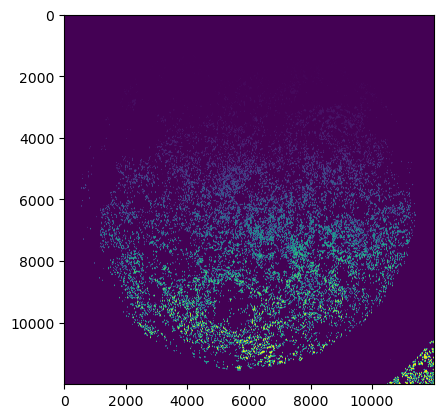

In [2]:
img = io.imread('p_cp_masks.png')
plt.imshow(img) 
plt.show()

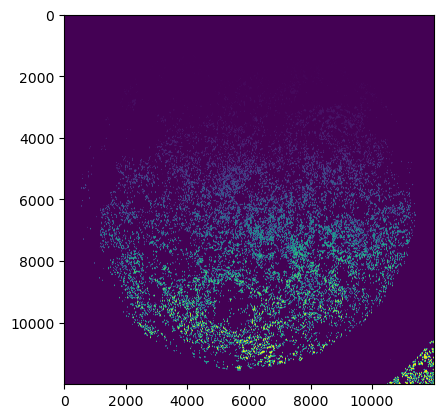

In [10]:
img = io.imread('p_cp_masks.png')
plt.imshow(img) 
plt.show()